# Face Emotion Recognition Tensorflow

## Importing Libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory as LoadImgs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

## Loading Images

In [2]:
def load_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img/255.0
    return img

def load_imgs(path):
    imgs,labels = [],[]
    for label in os.listdir(path):
        label_path = os.path.join(path,label)
        for img in os.listdir(label_path):
            img_path = os.path.join(label_path,img)
            imgs.append(load_img(img_path))
            labels.append(label)
    imgs = np.array(imgs)
    labels = np.array(labels)
    return imgs,labels
    
def plot_img(img):
    plt.imshow(img)
    plt.axis('off')

In [3]:
train_path = "/kaggle/input/fer2013/train"
test_path = "/kaggle/input/fer2013/test"

train_images_,train_labels_ = load_imgs(train_path)  
test_images_,test_labels_ = load_imgs(test_path)

([<matplotlib.patches.Wedge at 0x7db79c9d94b0>,
 [Text(1.033181655579577, 0.37753896033898915, 'surprise'),
  Text(0.4503612207773202, 1.0035809737235766, 'fear'),
  Text(-0.48841490537982485, 0.9856220777776931, 'angry'),
  Text(-1.090057847471277, 0.14755978166928246, 'neutral'),
  Text(-0.6487509407247235, -0.888325512922367, 'sad'),
  Text(-0.05597160493309147, -1.0985750677314745, 'disgust'),
  Text(0.7766419952084956, -0.7789911496792291, 'happy')],
 [Text(0.5635536303161328, 0.205930342003085, '11.2%'),
  Text(0.24565157496944737, 0.5474078038492235, '14.3%'),
  Text(-0.26640813020717713, 0.5376120424241961, '13.8%'),
  Text(-0.5945770077116056, 0.08048715363779042, '17.3%'),
  Text(-0.35386414948621275, -0.48454118886674563, '16.9%'),
  Text(-0.0305299663271408, -0.5992227642171679, '1.5%'),
  Text(0.4236229064773612, -0.4249042634613977, '25.0%')])

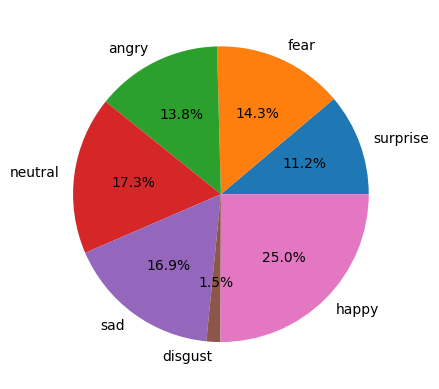

In [4]:
labels = np.concatenate((train_labels_,test_labels_))
classes_dict = Counter(labels)
plt.pie( classes_dict.values(),labels=classes_dict.keys(),autopct='%.1f%%')

## Visualizing Images

In [5]:
# label_indexes = random.sample(range(len(train_labels)),6)
# imgs = [train_images[i] for i in label_indexes]
# labels = [train_labels[i] for i in label_indexes]

# Plot the images with their labels
# fig, axes = plt.subplots(2, 3, figsize=(15, 8))
# axes = axes.flatten()

# for i in range(len(imgs)):
#     axes[i].imshow(imgs[i])
#     axes[i].set_title(labels[i])  # Set the title to the corresponding label
#     axes[i].axis('off')

# plt.tight_layout()
# plt.show()

In [6]:
normalize = lambda x,y:(tf.cast(x, tf.float32)/255.0,y) 
batch_size=16
train_images = LoadImgs(
    train_path,
    seed=432,
    color_mode='grayscale',  
    batch_size=batch_size,
    label_mode='categorical',
    image_size=(48, 48),
    shuffle=True
)

test_images = LoadImgs(
    test_path,
    seed=432,
    image_size=(48, 48),
    color_mode='grayscale',  
    batch_size=batch_size,
    label_mode='categorical'
)
train_images = train_images.map(normalize)
test_images = test_images.map(normalize)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


## Model Building and Training

In [7]:
model = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1)),
    MaxPool2D((2,2)),
    Dropout(0.3),
    Conv2D(128,(7,7),activation='relu'),
    MaxPool2D((2,2)),
    Dropout(0.3),
    Conv2D(128,(7,7),activation='relu'),
    MaxPool2D((2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(7,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 17, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 128)           │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,274,759 (4.86 MB)

 Trainable params: 1,274,759 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

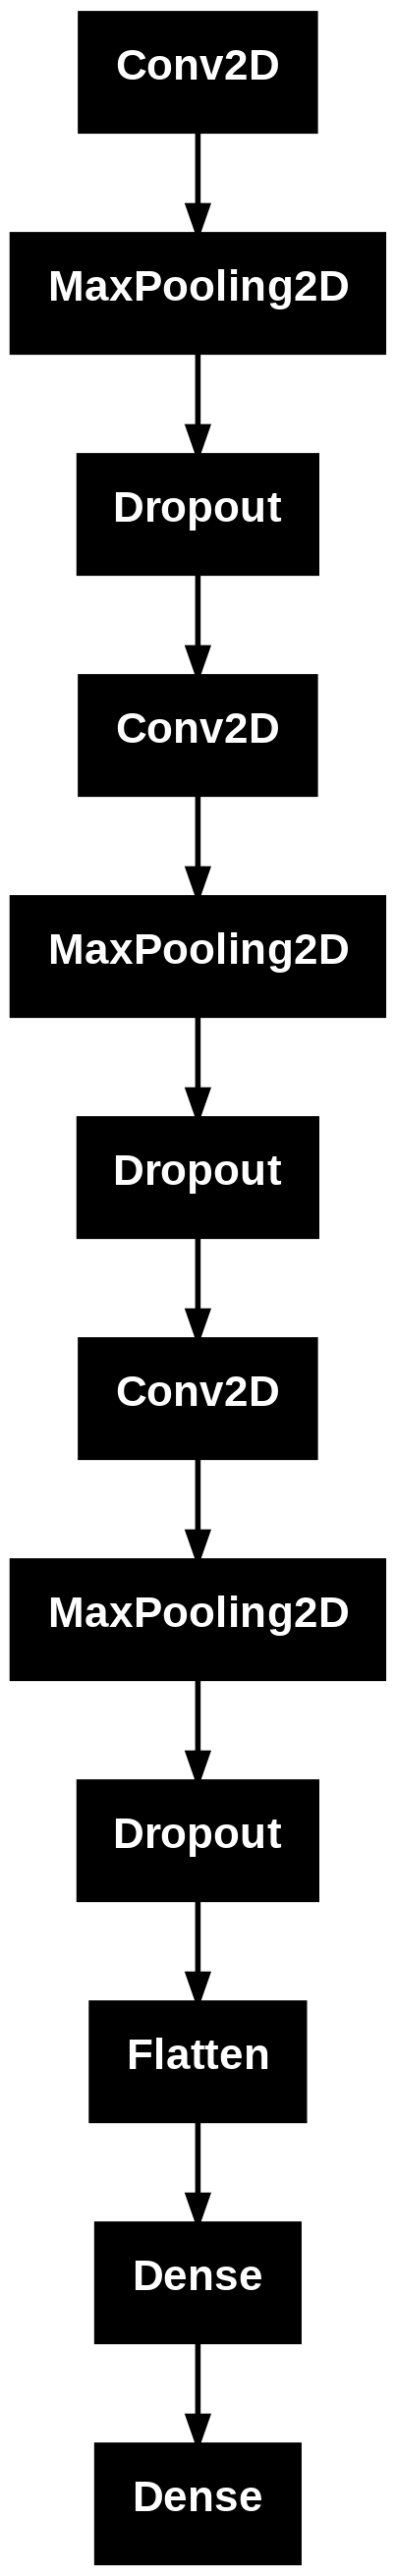

In [9]:
plot_model(model)

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5,baseline=0.4,min_delta=0.0001,restore_best_weights=True)

In [11]:
model.fit(train_images,validation_data=test_images,batch_size=32,shuffle=True,epochs=30)

Epoch 1/30
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.2603 - loss: 1.8002 - val_accuracy: 0.3706 - val_loss: 1.5804
Epoch 2/30
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3808 - loss: 1.5835 - val_accuracy: 0.4459 - val_loss: 1.4314
Epoch 3/30
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4288 - loss: 1.4739 - val_accuracy: 0.4579 - val_loss: 1.4139
Epoch 4/30
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4507 - loss: 1.4252 - val_accuracy: 0.4898 - val_loss: 1.3160
Epoch 5/30
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4776 - loss: 1.3734 - val_accuracy: 0.5057 - val_loss: 1.2879
Epoch 6/30
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4873 - loss: 1.3428 - val_accuracy: 0.5195 - val_loss: 1.2505
Epoch 7/30
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5038 - loss: 1.3070 - val_accuracy: 0.5294 - val_loss: 1.2336
Epoch 8/30
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5053 - loss: 1.28

In [12]:
model.evaluate(test_images)

449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5613 - loss: 1.1651


[1.1495296955108643, 0.5665923953056335]